In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#The data is being stored in a tree datastructure. 
#We access the charm root using this command
tree = uproot.open("hffrag.root:CharmAnalysis")

In [4]:
#Selects the branches of interest
true_branches = ["AnalysisAntiKt4TruthJets_pt","AnalysisAntiKt4TruthJets_eta","AnalysisAntiKt4TruthJets_phi","AnalysisAntiKt4TruthJets_ghostB_pdgId"]
reconstructed_branches = ["AnalysisJets_pt_NOSYS","AnalysisJets_eta","AnalysisJets_phi"]
b_hadrons = ["AnalysisAntiKt4TruthJets_ghostB_pt","AnalysisAntiKt4TruthJets_pt"]

In [5]:
#Returns the requested branches from the file
true_features = tree.arrays(true_branches) 
reconstructed_features = tree.arrays(reconstructed_branches)
b_hadrons = tree.arrays(b_hadrons)

In [6]:
def fixedbinning(xmin,xmax,nbins):
    #Returns a fixed set of bin edges
    return np.mgrid[xmin:xmax:nbins*1j]

def hist(xs,binning,normalized = False):
    ys = np.histogram(xs,bins = binning)[0]
    yerrs = np.sqrt(ys)
    if normalized:
        s = np.sum(ys)
        ys = ys / s
        yerrs = yerrs /s
    return ys, yerrs

def binneddensity(xs,binning,label = None, xlabel = None, ylabel = "binned probability density"):
    fig = plt.figure(figsize = (8,8))
    subfig = fig.add_subplot(111)
    
    ys , yerrs = hist(xs,binning,normalized = True)
    
    #Calculate the central value of each histogram bin and 
    #their width assuming fixed bin size
    
    xs = (binning[1:]+binning[:-1])/2.0
    xerrs = ((binning[1:]-binning[:-1]))/2.0
    
    subfig.errorbar(xs,ys,xerr = xerrs, yerr = yerrs, label = label, linewidth = 0, elinewidth = 2)
    
    subfig.set_xlabel(xlabel)
    subfig.set_ylabel(ylabel)
    
    return fig


In [7]:
truthjets = true_features['AnalysisAntiKt4TruthJets_pt']

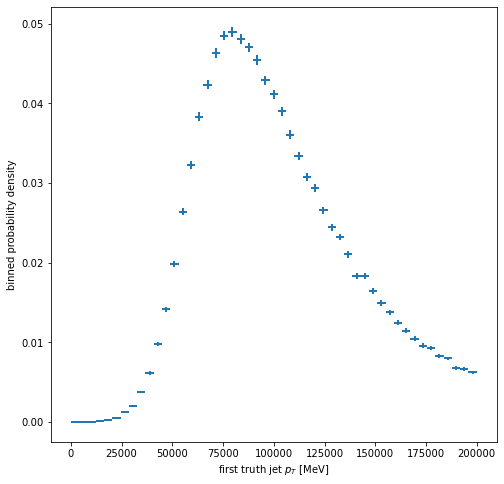

In [8]:
#Distribution of the transerve momentums of the first jet in each event
fig = binneddensity(truthjets[:,0],fixedbinning(0,200000,50),xlabel = "first truth jet $p_T$ [MeV]")

In [9]:
truthbhadronsid = ak.flatten(true_features["AnalysisAntiKt4TruthJets_ghostB_pdgId"],axis = None)

In [10]:
# Loop over all the b hadrons associated with the jets
counts = {}
for bhadid in truthbhadronsid:
    if bhadid in counts:
        counts[bhadid] +=1 
    else:
        counts[bhadid] = 1
for bhadid in counts:
    print(f"PDG ID{bhadid}\n number of b-hadrons: {counts[bhadid]}\n")

PDG ID531
 number of b-hadrons: 13487

PDG ID-521
 number of b-hadrons: 61531

PDG ID-511
 number of b-hadrons: 61243

PDG ID5232
 number of b-hadrons: 751

PDG ID511
 number of b-hadrons: 61706

PDG ID521
 number of b-hadrons: 61594

PDG ID-531
 number of b-hadrons: 13526

PDG ID-5122
 number of b-hadrons: 5447

PDG ID5122
 number of b-hadrons: 5232

PDG ID-5132
 number of b-hadrons: 676

PDG ID5132
 number of b-hadrons: 722

PDG ID-5232
 number of b-hadrons: 733

PDG ID555
 number of b-hadrons: 3

PDG ID553
 number of b-hadrons: 6

PDG ID-5332
 number of b-hadrons: 21

PDG ID5332
 number of b-hadrons: 18

PDG ID100553
 number of b-hadrons: 1

PDG ID-541
 number of b-hadrons: 5

PDG ID10551
 number of b-hadrons: 3

PDG ID541
 number of b-hadrons: 5

PDG ID20553
 number of b-hadrons: 1



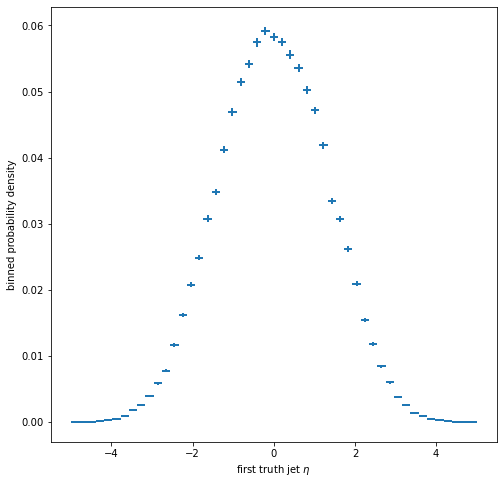

In [11]:
#Plotting a distribution of the truth jets eta
fig = binneddensity(true_features["AnalysisAntiKt4TruthJets_eta"][:,0],fixedbinning(-5,5,50),xlabel = "first truth jet $\eta$")
        

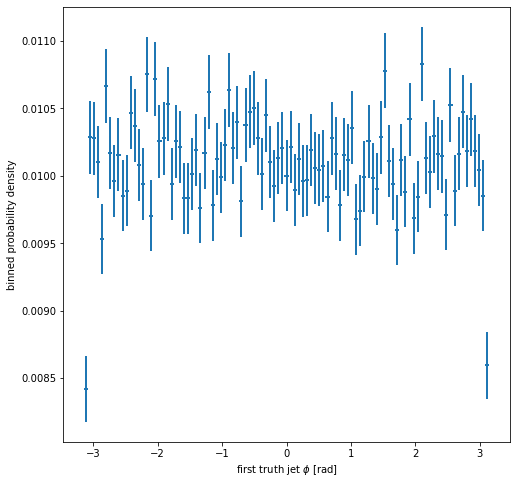

In [24]:
#Plotting a distribution of the truth jets phi
fig = binneddensity(true_features["AnalysisAntiKt4TruthJets_phi"][:,0],fixedbinning(-3.15,3.15,100),xlabel = "first truth jet $\phi$ [rad]")
        

reconstructed_features["AnalysisJets_pt_NOSYS"][:]

In [45]:
reconstructed_features["AnalysisJets_pt_NOSYS"][1059]

<Array [] type='0 * float32'>

In [36]:
reconstructed_pt = reconstructed_features["AnalysisJets_pt_NOSYS"]
masked_list = []
for element in reconstructed_pt:
    mask = (ak.count(element) != 0)
    masked_list.append(mask) 

1059 []
5872 []
9112 []
9517 []
12544 []
24272 []
25317 []
25582 []
29105 []
30877 []


KeyboardInterrupt: 

In [47]:
print(len(masked_list))
reconstructed_pt = reconstructed_pt[masked_list]

32007


ValueError: in RegularArray attempting to get 31997, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.10.1/src/cpu-kernels/awkward_RegularArray_getitem_next_array_regularize.cpp#L19)

In [15]:
print(reconstructed_pt[:,0])

[1.67e+05, 7.96e+04, 1.22e+05, 1.18e+05, ... 1.05e+05, 1.04e+05, 6.08e+04, 9.4e+04]


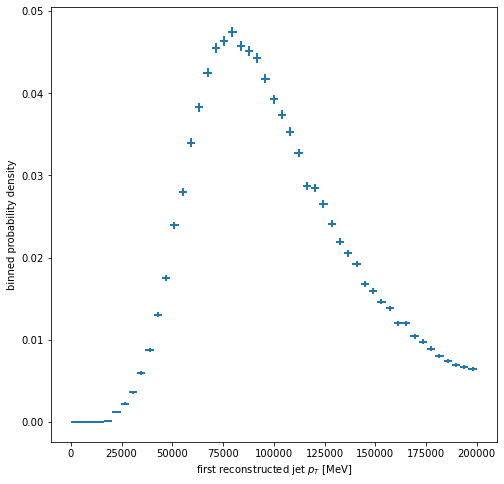

In [16]:
#Plotting a distribution of the reconstructured distribution of jets pt
fig = binneddensity(reconstructed_pt[:,0],fixedbinning(0,200000,50),xlabel = "first reconstructed jet $p_T$ [MeV]")

In [17]:
reconstructed_eta = reconstructed_features["AnalysisJets_eta"]
masked_list_eta = []
for element in reconstructed_eta:
    mask = (ak.count(element) != 0)
    masked_list_eta.append(mask) 

In [18]:
print(len(masked_list_eta))
reconstructed_eta = reconstructed_eta[masked_list_eta]

141465


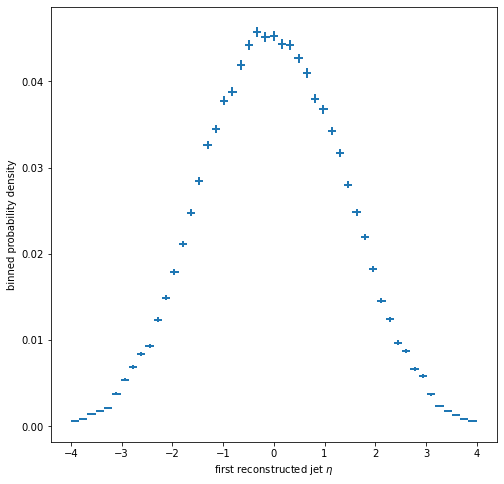

In [19]:
#Plotting a distribution of the reconstructured distribution of jets pt
fig = binneddensity(reconstructed_eta[:,0],fixedbinning(-4,4,50),xlabel = "first reconstructed jet $\eta$")

In [20]:
reconstructed_phi = reconstructed_features["AnalysisJets_phi"]
masked_list_phi = []
for element in reconstructed_phi:
    mask = (ak.count(element) != 0)
    masked_list_phi.append(mask) 

In [21]:
print(len(masked_list_phi))
reconstructed_phi = reconstructed_phi[masked_list_phi]

141465


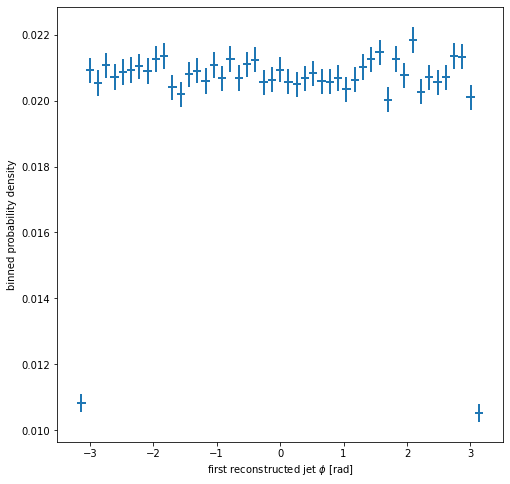

In [22]:
#Plotting a distribution of the reconstructured distribution of jets pt
fig = binneddensity(reconstructed_phi[:,0],fixedbinning(-3.2,3.2,50),xlabel = "first reconstructed jet $\phi$ [rad]")

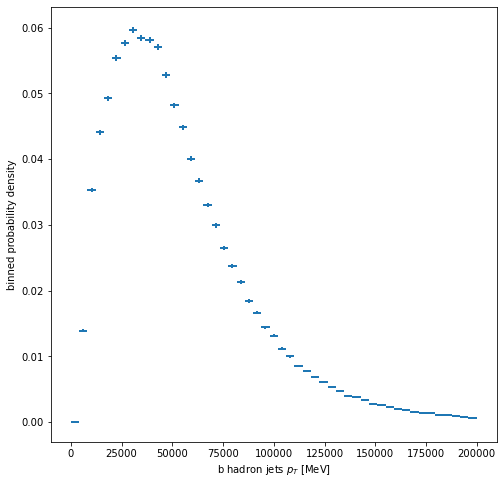

In [23]:
b_hadron_jet_pt = ak.flatten(b_hadrons["AnalysisAntiKt4TruthJets_ghostB_pt"],axis = None)
fig = binneddensity(b_hadron_jet_pt[:],fixedbinning(0,200000,50),xlabel = "b hadron jets $p_T$ [MeV]")